In [36]:
import numpy as np
import pandas as pd

In [37]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [38]:
df.drop('Name',axis=1,inplace=True)

In [39]:
df.columns=['Age','Income']

In [40]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


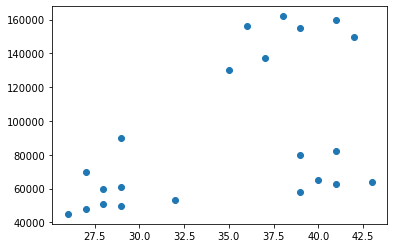

In [41]:
import matplotlib.pyplot as plt
plt.scatter(df.Age,df['Income'])

In [42]:
from sklearn.cluster import KMeans

In [43]:
k=KMeans(n_clusters=3)

In [44]:
k

KMeans(n_clusters=3)

In [45]:
ypred=k.fit_predict(df)

In [46]:
k

KMeans(n_clusters=3)

In [47]:
df['cluster']=ypred
df.head()

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


In [48]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]


In [49]:
df0

,Age,Income,cluster
2,29,61000,0
3,28,60000,0
11,26,45000,0
12,27,48000,0
13,28,51000,0
14,29,49500,0
15,32,53000,0
16,40,65000,0
17,41,63000,0
18,43,64000,0


In [50]:
df1

,Age,Income,cluster
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1
10,37,137000,1


In [51]:
df2

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
19,39,80000,2
20,41,82000,2


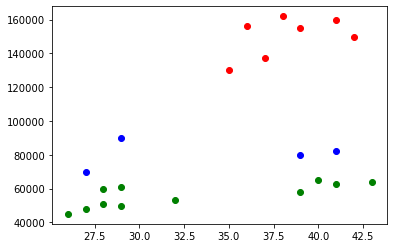

In [52]:
plt.scatter(df0.Age,df0.Income,color="green",label='0')
plt.scatter(df1.Age,df1.Income,color="red",label='1')
plt.scatter(df2.Age,df2.Income,color="blue",label='2')



In [53]:
#clusering happened based on salary
#we need to perform scailing to make good cluster

In [54]:
#the above cluster is not good

In [55]:
from sklearn.preprocessing import MinMaxScaler


In [56]:
df.drop('cluster',axis=1,inplace=True)

In [57]:
df

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [58]:
mm=MinMaxScaler()
df[['Age','Income']]=mm.fit_transform(df)

In [59]:
df.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


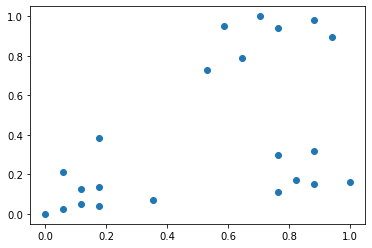

In [60]:
plt.scatter(df.Age,df.Income)

In [61]:
k=KMeans(n_clusters=3)

In [62]:
ypred=k.fit_predict(df)

In [63]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score(df,ypred)

0.7129710183539274

In [67]:
ssd=[]
ss=[]
for i in range(2,11):
    k=KMeans(n_clusters=i)
    k.fit(df)
    ypred=k.predict(df)
    ss.append(silhouette_score(df,ypred))
    ssd.append(k.inertia_) 

In [71]:
#silhoutee_Score

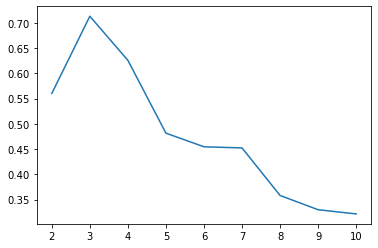

In [69]:
plt.plot(range(2,11),ss)

In [28]:
df['cluster']=ypred
df.head()

,Age,Income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2


In [29]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

In [30]:
df0

,Age,Income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
11,0.000000,0.000000,0
12,0.058824,0.025641,0
13,0.117647,0.051282,0
14,0.176471,0.038462,0
15,0.352941,0.068376,0


In [31]:
df1

,Age,Income,cluster
16,0.823529,0.170940,1
17,0.882353,0.153846,1
18,1.000000,0.162393,1
19,0.764706,0.299145,1
20,0.882353,0.316239,1
21,0.764706,0.111111,1


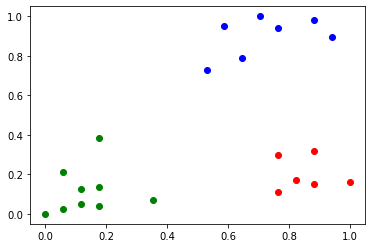

In [32]:
plt.scatter(df0.Age,df0.Income,color="green",label='0')
plt.scatter(df1.Age,df1.Income,color="red",label='1')
plt.scatter(df2.Age,df2.Income,color="blue",label='2')


In [35]:
k.inertia_  #ssd

0.4750783498553097

In [36]:
ssd=[]
for i in range(1,11):
    k=KMeans(n_clusters=i)
    k.fit(df)
    ssd.append(k.inertia_) 

In [37]:
ssd

[20.024920602897268,
 5.321905619468309,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21055478995472496,
 0.1685851223602976,
 0.1397684499538816,
 0.10188787724979426,
 0.08139933135681812]

In [70]:
#Elbow method

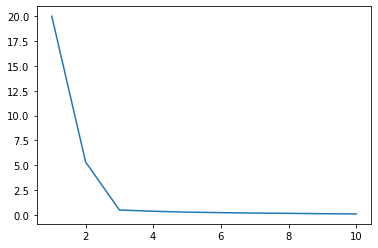

In [39]:
plt.plot(range(1,11),ssd)